# Understanding qubits

The _spin_ of a particle is a property that, along with position, mass, charge, etc. specify its state. Spin is a quintessentially quantum property, behaving in a way that exhibits all the aspects of quantum mechanics that make the subject counterintuitive.

The physical property of an electron spin can be abstracted to the mathematical concept of a _qubit_, which is the quantum version of the classical binary bit.

Classical and quantum mechanics differ in two important ways:

1. their relationships between states and measurements;
2. their structures of logic \(axioms, rules, basic entities, etc.\)

We'll explore each of these differences by way of simple but surprising experiments.

## States and Measurements

First let's explore the relationship between states and measurements by considering an electron with spin $\sigma$ and an apparatus $A$ to measure the spin and display \(record\) the result. The apparatus has arrow labels to show how it is oriented.

![Apparatus](img/statesAndMeasurements_00.png)

Before the apparatus interacts with \(measures\) the spin, the display is blank. After it measures $\sigma$, the display shows +1 or -1.

#### Repeating a Measurement

Consider this simple experiment: point the apparatus in, say, the $z$ direction and measure the spin; then set the apparatus to neutral and measure the same spin again; then repeat the process many times. If spin was like any other classical property, we'd expect that the initial result $\sigma = +1$ would be followed by a sequence of $\sigma = +1$ , and similarly if we initially measured $\sigma = -1$. This hypothesis is drawn below.

![Experiment 1](img/statesAndMeasurements_01.png)

To see if our intuion is correct, we can run this experiment in simulation using Qiskit. As we switch back and forth between speaking of spins and our apparatus versus qubits and the Qiskit simulation, the values of spin {+1, -1} which are natural for thinking about orientation, are relabeled as the qubit states {0, 1} which are natural for relating qubits to bits. 

Before we can run the experiment, we need to first [install Qiskit](https://qiskit.org/documentation/install.html). Once it's installed, import it along with NumPy:

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.tools.visualization import circuit_drawer, plot_histogram
import numpy as np
from numpy import pi

The experiment can be described by a `QuantumCircuit` with a single qubit (in a `QuantumRegister`) and as many bits (in a `ClassicalRegister`) as we would like to store each measurement.

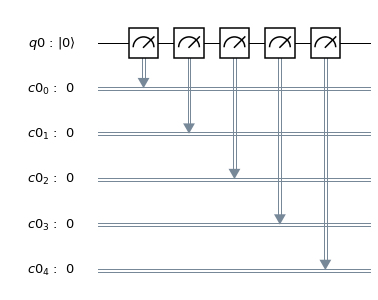

In [2]:
num_measurements = 5

q = QuantumRegister(1)
c = ClassicalRegister(num_measurements)

circ = QuantumCircuit(q,c)

for m in range(num_measurements):
    circ.measure(q[0],c[m]) 

circuit_drawer(circ, output='mpl')

Qiskit has several simulators in an included module called [Aer](https://qiskit.org/aer). Since our simulation involves measurements, we will use the simulator called `qasm_simulator`. Perform the simulation using `execute`, and specify that the experiment is to be done only once by passing the parameter/value pair `shots=1`. 

In [3]:
backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(circ, backend_sim, shots=1)

result_sim = job_sim.result()

You can access the result with the `get_counts` function.

In [4]:
counts = result_sim.get_counts(circ)
print(counts)

{'00000': 1}


The printed result is to be read from right to left, as you would extend a binary number counting from zero. The number after the colon (`:`) is the number of `shots` for which this result was observed.

Our initial measurement of $\sigma = +1$ ($q = 0$) was verified for all subsequent measurements. We say that the apparatus _prepares_ the spin in a state, and further measurements _confirm_ the state.

#### Flipping our Perspective

A simple change in the experiment will help reveal more of the spin's spatial nature. Now, after preparing the spin \(by measuring it with $A$\) we flip $A$ upside down, then measure $\sigma$ again. Our classical intuition tells us that if we initially prepared $\sigma = +1$, then the flipped apparatus displays $\sigma = -1$ \(and similarly if we prepared $\sigma = -1$\). Our intuitive expectation is drawn below

![Experiment 2](img/statesAndMeasurements_02.png)

Let's run the experiment in simulation. To flip the apparatus, we will use a quantum circuit gate called the $R_x$ gate, which we'll explain in detail later. For now, it's enough to know that $R_x$ rotates the apparatus about the $x$ axis. _(In quantum circuits, we flip the qubit with gates, not the circuit, but for now, let's shift our perspective as we flip it.)_

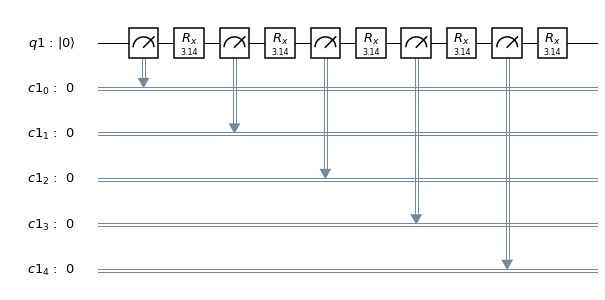

In [5]:
num_measurements = 5

q = QuantumRegister(1)
c = ClassicalRegister(num_measurements)

circ = QuantumCircuit(q,c)

for k in range(num_measurements):
    circ.measure(q[0],c[k])
    circ.rx(pi, q[0])

circuit_drawer(circ, output='mpl')

In [6]:
job_sim = execute(circ, backend_sim, shots=1)

result_sim = job_sim.result()

counts = result_sim.get_counts(circ)
print(counts)

{'01010': 1}


Rememer that qubit measurement values of {0,1} are labels for spin measurement values of {+1, -1}. From the results of our simulation, we see that every time we flip the apparatus, the spin's value flips sign. This behavior shows that $\sigma$ has an orientation in space. We might be inclined to think that the spin is like a spatial vector with components $\sigma_x$, $\sigma_y$, $\sigma_z$. Let's consider another experiment to explore this hypothesis.

#### Lying it Down

Another simple change in the experiment will finally reveal the counterintuitive quantum nature of spin. Now, after preparing a spin with $A$ pointed along the $z$ axis, we rotate $A$ through an arbitrary angle, say $\pi/2$ radians \(90 degrees\) about the $x$ axis to have $A$ pointing along the $y$ axis, then measure $\sigma$ again. This experiment is drawn below.

![Experiment 3](img/statesAndMeasurements_03.png)

If our hypothesis that $\sigma$ is a spatial vector is correct, then we'll have measured $\sigma_z$, then $\sigma_y$; if we prepared $\sigma_z = \pm 1$, then we should find that $\sigma_y = 0$.

Let's run the experiment. To rotate the apparatus about the $x$ axis, we'll use the $R_x$ quantum gate again.

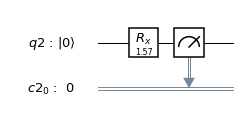

In [7]:
num_measurements = 1

q = QuantumRegister(1)
c = ClassicalRegister(num_measurements)

circ = QuantumCircuit(q,c)

circ.rx(pi/2, q)
circ.measure(q, c)

circuit_drawer(circ, output='mpl')

In [8]:
job_sim = execute(circ, backend_sim, shots=1)

result_sim = job_sim.result()

counts = result_sim.get_counts(circ)
print(counts)

{'1': 1}


The printed result shows that, counter to our intuition, we do **not** find that $\sigma_y = 0$ ($q_y = 1/2$). Instead, we have found that the apparatus measures either $\sigma_y = +1$ or $\sigma_y = -1$ ($q_y = 0$ or $q_y = 1$). In fact, no matter which way $A$ is pointed, it only ever measures \(displays\) $\sigma = \pm 1$ ($q = 0$ or $q = 1$).

The second experiment showed that spin does have a spatial orientation, but the third experiment revealed that it is not described well by a spatial vector. Let's experiment further to get a better mathematical understanding of the system.

The procedures of the first two experiments followed a simple pattern when repeated in a series. Let's see what happens if we repeat the procedure in the third experiment:

1. Point $A$ along the $z$ axis.
2. Prepare $\sigma = +1$.
3. Rotate $A$ to point along the $y$ axis.
4. Measure $\sigma$.
5. Record the result.

Intuitively, we'd expect each measurement to be consistent: verifying the true, real state of the spin. Let's run the experiment to see if our intution is confirmed.

In [9]:
repetitions = 1024

job_sim = execute(circ, backend_sim, shots=repetitions)

result_sim = job_sim.result()

counts = result_sim.get_counts(circ)
print(counts)

{'1': 511, '0': 513}


The printed result shows the number of times each state was observed out of the 1024 `shots` (repetitions) of our simulation. We can visualize the results as a histogram:

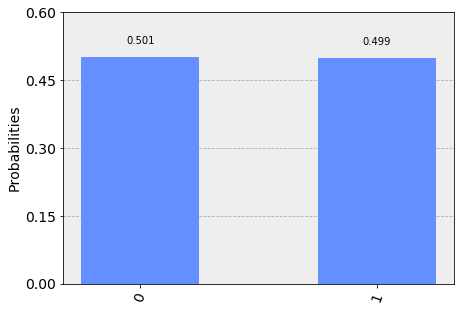

In [10]:
plot_histogram(counts)

The repeated procedure has resulted in a random series of +1 and -1! This is absolutely not consistent with our inuition of deterministic reality if spin is a spatial vector. However, the result does not point to total chaos. With enough repetitions, we'd find that the +1 and -1 events occur with equal frequency. In other words, the events have an equal probability of occurrence with an average spin value of zero.

We've found that the average of many repeated measurements is what we'd intuitively \(classically\) expect of a spatial vector, although each individual measurement is not. This is a conceptual bridge between our classical expectations and quantum behavior. If the initial and final orientations of the apparatus where other than along the $z$ and $y$ axes, we would find the same result: an average value that agrees with the classical intuition of spatial vectors, and individual random measurements of +1 and -1 that run counter to the classical intuition.

#### Testing Your New Quantum Intuition

To test your new intuition, consider what would happen if we first prepared $\sigma = +1$ along the $z$ axis, pointed $A$ along the $y$ axis to make a measurement, then spun $A$ back to its original orientation. If we made another measurement along the $z$ axis, would we confirm the first result every time we ran this procedure?

The answer is... no. Consider how this scenario is similar to the third experiment.

In this scenario, the intermediate measurement along the $y$ axis leaves the spin in a random state prior the final measurement along the $z$ axis. The measuring of one component \($\sigma_y$\) destroys information about another component \($\sigma_z$\). In general, any interaction that is strong enough to measure an aspect of a quantum system is necessarily strong enough to disrupt another aspect of that system.

Even if you agree with the argument above, I strongly encourage you to write your own Qiskit simulation of this experiment.

### Logical Propositions